# BlogFeedback Pre-Processing + Initial EDA

### 1. Importing Dependencies

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 2. Extract Data

In [128]:
df = pd.read_csv("/Users/lexy/Desktop/BlogFeedback/bf_data/blogData_train.csv", header = None, names = list(range(1,282)))
print("Shape is:", df.shape)
#display(df.head())

Shape is: (52397, 281)


#### 2.1. Preprocessing

In [129]:
# Renaming columns for ease of understanding and handling

df_path = "/Users/lexy/Desktop/BlogFeedback/bf_data/blogData_train.csv"

# Aggregate Stats 
stat_col_list = []
for i in range(51,61,1):
    stat_col_list.append('mean' + '_' + str(i))
    stat_col_list.append('sd' + '_' + str(i))
    stat_col_list.append('min' + '_' + str(i))
    stat_col_list.append('max' + '_' + str(i))
    stat_col_list.append('median' + '_' + str(i))
df_stats = pd.read_csv(df_path, header = None, names = stat_col_list, usecols = list(range(0,50,1)))

# Number of comments
num_comments_col_list = ['num_comments_51', 'num_comments_52', 'num_comments_53', 'num_comments_54', 'num_comments_55']
df_num_comments = pd.read_csv(df_path, header = None, names = num_comments_col_list, usecols = list(range(50,55,1)))

# Number of trackbacks
num_trackbacks_col_list = ['num_trackbacks_56', 'num_trackbacks_57', 'num_trackbacks_58', 'num_trackbacks_59', 'num_trackbacks_60']
df_num_trackbacks = pd.read_csv(df_path, header = None, names = num_trackbacks_col_list, usecols = list(range(55,60,1)))

# Time post was published for (61)
df_time_col_list = ['time_TBTP']
df_time = pd.read_csv(df_path, header = None, names = df_time_col_list, usecols = list(range(60,61)))

# Length of post (62)
df_length_col_list = ['length_post']
df_length = pd.read_csv(df_path, header = None, names = df_length_col_list, usecols = list(range(61,62)))

# bag of words cols (63 to 262)
df_bow_col_list = []
for i in range(63,263,1):
    df_bow_col_list.append('bow_' + str(i))
df_bow = pd.read_csv(df_path, header = None, names = df_bow_col_list, usecols = list(range(62,262,1)))

# day of week of basetime
df_dow_TB_col_list = ['Mon_TB', 'Tue_TB', 'Wed_TB', 'Thu_TB', 'Fri_TB', 'Sat_TB', 'Sun_TB']
df_dow_TB = pd.read_csv(df_path, header = None, names = df_dow_TB_col_list, usecols = list(range(262,269, 1)))

# day of week of post 
df_dow_TP_col_list = ['Mon_TP', 'Tue_TP', 'Wed_TP', 'Thu_TP', 'Fri_TP', 'Sat_TP', 'Sun_TP']
df_dow_TP = pd.read_csv(df_path, header = None, names = df_dow_TP_col_list, usecols = list(range(269,276, 1)))

# parent pages
df_parent_page_col_list = ['num_parent']
df_parent = pd.read_csv(df_path, header = None, names = df_parent_page_col_list, usecols = list(range(276,277)))

# Aggregate Stats Ps
stat_col_list2 = ['min_num_comments_P', 'max_num_comments_P', 'mean_num_comments_P']
df_stats2 = pd.read_csv(df_path, header = None, names = stat_col_list2, usecols = list(range(277,280, 1)))

# Target (num comments in 24 hours after TB)
target_col_list = ['num_comments_next_24_TB']
df_target = pd.read_csv(df_path, header = None, names = target_col_list, usecols = list(range(280,281)))

In [130]:
# Merging back into 1 df
merged_df = df_stats.merge(df_num_comments, left_index = True, right_index = True)
merged_df = merged_df.merge(df_num_trackbacks, left_index = True, right_index = True)
merged_df = merged_df.merge(df_time, left_index = True, right_index = True)
merged_df = merged_df.merge(df_length, left_index = True, right_index = True)
merged_df = merged_df.merge(df_bow, left_index = True, right_index = True)
merged_df = merged_df.merge(df_dow_TB, left_index = True, right_index = True)
merged_df = merged_df.merge(df_dow_TP, left_index = True, right_index = True)
merged_df = merged_df.merge(df_parent, left_index = True, right_index = True)
merged_df = merged_df.merge(df_stats2, left_index = True, right_index = True)
merged_df = merged_df.merge(df_target, left_index = True, right_index = True)

merged_df['dow_P'] = ''
merged_df['dow_P'] = np.where(merged_df.Mon_TP == 1, 'Mon_P', merged_df.dow_P)
merged_df['dow_P'] = np.where(merged_df.Tue_TP == 1, 'Tue_P', merged_df.dow_P)
merged_df['dow_P'] = np.where(merged_df.Wed_TP == 1, 'Wed_P', merged_df.dow_P)
merged_df['dow_P'] = np.where(merged_df.Thu_TP == 1, 'Thu_P', merged_df.dow_P)
merged_df['dow_P'] = np.where(merged_df.Fri_TP == 1, 'Fri_P', merged_df.dow_P)
merged_df['dow_P'] = np.where(merged_df.Sat_TP == 1, 'Sat_P', merged_df.dow_P)
merged_df['dow_P'] = np.where(merged_df.Sun_TP == 1, 'Sun_P', merged_df.dow_P)

In [131]:
merged_df.head()

,mean_51,sd_51,min_51,max_51,median_51,mean_52,sd_52,min_52,max_52,median_52,...,Thu_TP,Fri_TP,Sat_TP,Sun_TP,num_parent,min_num_comments_P,max_num_comments_P,mean_num_comments_P,num_comments_next_24_TB,dow_P
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Thu_P
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wed_P
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wed_P
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Thu_P
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,Thu_P


### 3. Exploratory Data Analysis

#### 3.0. Missing Data + Pre-processing
- No missing data
- Identified potential KPIs
    - num_comments_51
    - num_trackbacks_45
    - num_comments_next_24_TB
- Identified a field that could negatively impact analysis and modelling (num_parents)

In [206]:
# Checking for any missing data.
print("Number of missing values:", merged_df.isnull().values.sum())
merged_df.head()

Number of missing values: 0


,mean_51,sd_51,min_51,max_51,median_51,mean_52,sd_52,min_52,max_52,median_52,...,Thu_TP,Fri_TP,Sat_TP,Sun_TP,num_parent,min_num_comments_P,max_num_comments_P,mean_num_comments_P,num_comments_next_24_TB,dow_P
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Thu_P
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wed_P
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Wed_P
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Thu_P
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,Thu_P


In [207]:
merged_df.shape

(52397, 282)

In [208]:
merged_df.drop_duplicates(inplace=True)

In [209]:
merged_df.shape

(49203, 282)

#### 3.1. Number of Parent Pages (277)
- 95% of the data of blogposts here don't have any parents, which means that they are mostly original posts. 
- 2% of the training data have between 2-10 parent blog posts. 
- There is a small number of outliers who have 20-140 parents. These should be excluded.

> Statistical Summary of num_parent


count    49203.000000
mean         0.126903
std          1.483810
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        136.000000
Name: num_parent, dtype: float64

> Graphical Distribution of num_parent


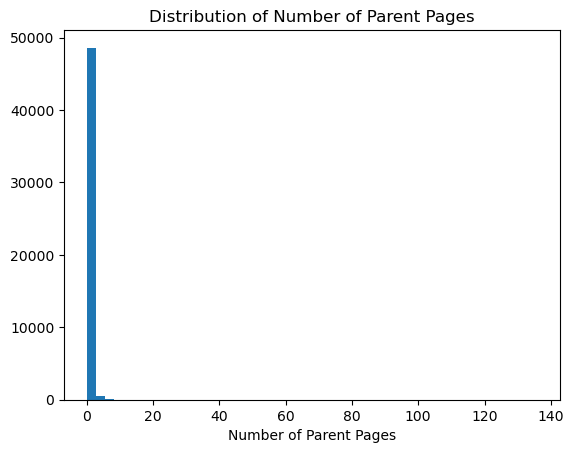

> Insight: We can see from the statistics summary + the distribution that most of the data is a parent blog in itself and there are not many trackback blogs


In [210]:
data = merged_df.num_parent

print("> Statistical Summary of num_parent")
display(data.describe())

print("> Graphical Distribution of num_parent")
plt.hist(data, bins = 50)
plt.title("Distribution of Number of Parent Pages")
plt.xlabel("Number of Parent Pages")
plt.show()
print("> Insight: We can see from the statistics summary + the distribution that most of the data is a parent blog in itself and there are not many trackback blogs")

> Graphical Distribution of num_parent


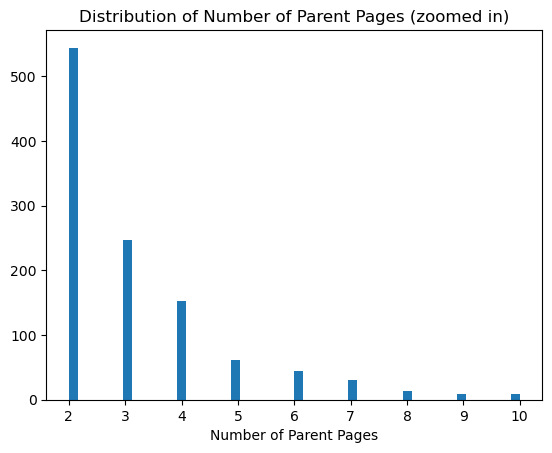

> Insight: If we zoom in to the range 2~10 parent pages, we can see that it tapers off around 10


In [211]:
print("> Graphical Distribution of num_parent")
plt.hist(data, bins = 50, range = (2,10))
plt.title("Distribution of Number of Parent Pages (zoomed in)")
plt.xlabel("Number of Parent Pages")
plt.show()
print("> Insight: If we zoom in to the range 2~10 parent pages, we can see that it tapers off around 10")

In [212]:
print("> Insight: Note that there are some outliers here that we might want to remove from the data... (i.e. let's remove data that has above 15 parent pages...)") 
data[data > 15]

> Insight: Note that there are some outliers here that we might want to remove from the data... (i.e. let's remove data that has above 15 parent pages...)


13231    136.0
13232    136.0
13234    136.0
13272    101.0
13274    101.0
13275    101.0
13294     35.0
13296     32.0
13298     32.0
28433     21.0
28434     20.0
28435     20.0
Name: num_parent, dtype: float64

In [213]:
print("> Insight: The percentage of training data that is the source post")
print(100 * data[data == 0].shape[0] / data.shape[0], "\n")

print("> Insight: The percentage of training data that has between 2 and 10 parents")
print(100 * data[(data >= 2) & (data <= 10)].shape[0] / data.shape[0])

> Insight: The percentage of training data that is the source post
94.38245635428734 

> Insight: The percentage of training data that has between 2 and 10 parents
2.2620571916346566


#### 3.2. Number of Comments before BaseTime (51)
- 75% of instances have less than 25 comments before basetime.
- 89% of instances have less than 100 comments before basetime.
- Therefore, let's define blog posts with number of comments in the top 10% as exceptionally performing blog posts. i.e. If a blog post has above 100 comments, then it is in the top 10% of blog posts.

Extra
- Note that if we want to use col_52/col_57, then we can only use this if col_61 >= 24 hrs (to ensure that we haev full range of comments/trackbacks)
- Note that if we awnt to use col_53/col_58, then we can only use this if col_61 >= 48 hrs (to ensure that we have full range of comments/trackbacks)

> Statistical Summary of num_comments_51


count    49203.000000
mean        38.097575
std        111.246130
min          0.000000
25%          0.000000
50%          3.000000
75%         22.000000
max       2044.000000
Name: num_comments_51, dtype: float64

> Graphical Distribution of num_comments_51


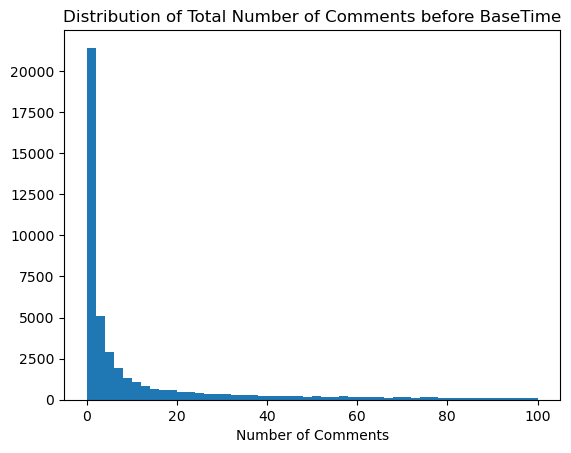

> Insight: We can see from the statistics summary + the distribution that most of the data is a parent blog in itself and there are not many trackback blogs


In [214]:
data = merged_df.num_comments_51

print("> Statistical Summary of num_comments_51")
display(data.describe())

print("> Graphical Distribution of num_comments_51")
plt.hist(data, bins = 50, range = (0, 100))
plt.title("Distribution of Total Number of Comments before BaseTime")
plt.xlabel("Number of Comments")
plt.show()
print("> Insight: We can see from the statistics summary + the distribution that most of the data is a parent blog in itself and there are not many trackback blogs")

In [215]:
100 * data[data <= 50].shape[0] / data.shape[0]

100 * data[data > 100].shape[0] / data.shape[0]

9.960774749507143

#### 3.3. Number of Trackbacks before BaseTime (56)
- 81% of the data does not have a trackback. Maybe we should not use this feature
- So, only 19% of the data has at least 1 trackback. Would be interesting to see the correlation between trackback and final number of comments
- But I think trackbacks should not be used as an engagement KPI. It should instead just be used as a feature to determine customer engagement.

> Statistical Summary of num_trackbacks_56


count    49203.000000
mean         0.510762
std          1.587694
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: num_trackbacks_56, dtype: float64

> Graphical Distribution of num_trackbacks_56


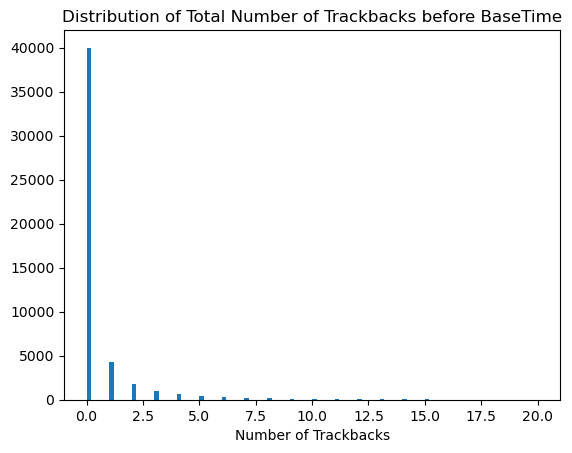

> Insight: Trackbacks might not be usable for this data


In [216]:
data = merged_df.num_trackbacks_56

print("> Statistical Summary of num_trackbacks_56")
display(data.describe())

print("> Graphical Distribution of num_trackbacks_56")
plt.hist(data, bins = 100, range = (0, 20))
plt.title("Distribution of Total Number of Trackbacks before BaseTime")
plt.xlabel("Number of Trackbacks")
plt.show()
print("> Insight: Trackbacks might not be usable for this data")

In [217]:
print(100*data[data == 0].shape[0]/data.shape[0])
print(100*data[data > 0].shape[0]/data.shape[0])

81.26333760136578
18.73666239863423


#### 3.4. Number of Comments after 24 hours (281)
- You only need 9 comments and above in the following 24 hours to put you in the top 10% by this metric.
- 64% of the data have 0 new comments 24 hours BaseTime. Could this be due to the time horizon between publish and Basetime being too small or too large? i.e. did we miss the peak of comments because we were too early or or too late... 

> Statistical Summary of num_comments_next_24_TB


count    49203.000000
mean         6.714875
std         38.497199
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1424.000000
Name: num_comments_next_24_TB, dtype: float64

> Graphical Distribution of num_comments_next_24_TB


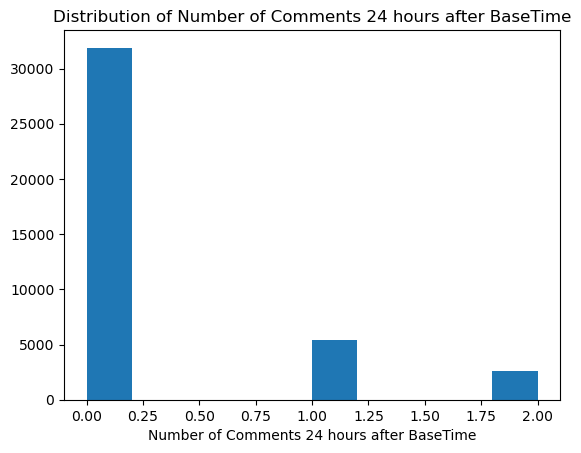

> Insight: The target is actually highly imbalanced. Most 


In [218]:
data = merged_df.num_comments_next_24_TB

print("> Statistical Summary of num_comments_next_24_TB")
display(data.describe())

print("> Graphical Distribution of num_comments_next_24_TB")
plt.hist(data, range = (0,2))
plt.title("Distribution of Number of Comments 24 hours after BaseTime")
plt.xlabel("Number of Comments 24 hours after BaseTime")
plt.show()
print("> Insight: The target is actually highly imbalanced. Most ")

In [219]:
print(data[data == 0].shape[0] * 100 / data.shape[0])
print(data[data == 1].shape[0] * 100 / data.shape[0])
print(data[data == 2].shape[0] * 100 / data.shape[0])
print(data[data == 3].shape[0] * 100 / data.shape[0])
print(data[data == 4].shape[0] * 100 / data.shape[0])

64.80905635835214
11.029815255167367
5.339105339105339
3.079080543869276
2.107595065341544


In [220]:
print(data[data <= 8].shape[0] * 100 / data.shape[0])

90.74853159360201


#### 3.5. Length of Time between Publish and Basetime (61)
- NB: (could be used as a filter to predict at publish time or predict at 3 days after...)
- Data is distributed in such a way that there are 3 peaks of data: 14 hrs, 38 hrs, 62 hrs (this helps us identify at which points we have the most data and at which points we don't)

> Statistical Summary of time_TBTP


count    49203.000000
mean        34.788875
std         20.662955
min          0.000000
25%         14.000000
50%         35.000000
75%         55.000000
max         72.000000
Name: time_TBTP, dtype: float64

> Graphical Distribution of number of hours between PublishTime and BaseTime


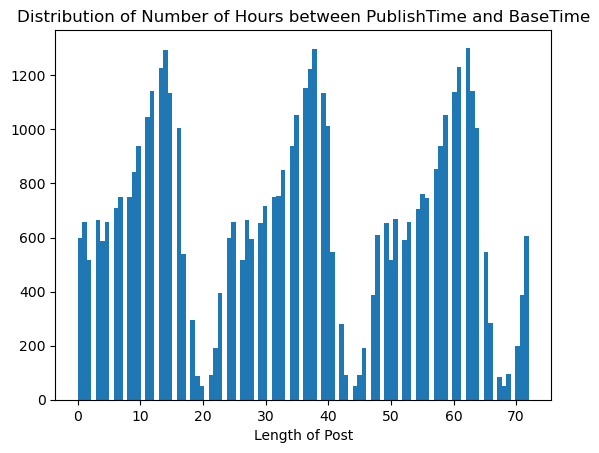

> Insight: Data is distributed at 3 peaks between 10-20, 30-40, and 60-70 hours


In [221]:
data = merged_df.time_TBTP

print("> Statistical Summary of time_TBTP")
display(data.describe())

print("> Graphical Distribution of number of hours between PublishTime and BaseTime")
plt.hist(data, bins = 100)
plt.title("Distribution of Number of Hours between PublishTime and BaseTime")
plt.xlabel("Length of Post")
plt.show()
print("> Insight: Data is distributed at 3 peaks between 10-20, 30-40, and 60-70 hours")

> Graphical Distribution of number of hours between PublishTime and BaseTime


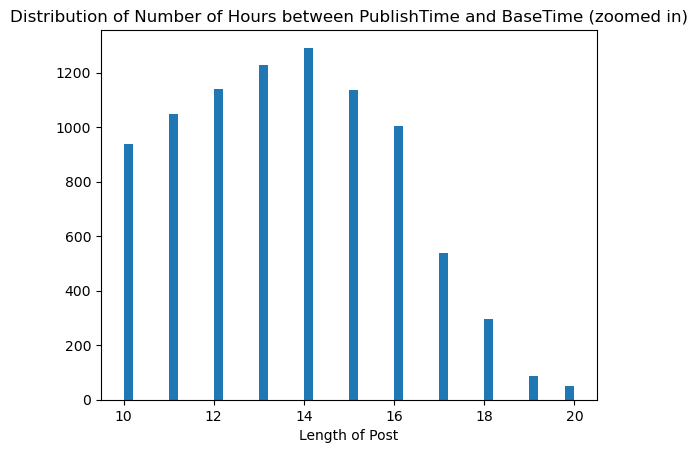

In [222]:
print("> Graphical Distribution of number of hours between PublishTime and BaseTime")
plt.hist(data, bins = 50, range = (10,20))
plt.title("Distribution of Number of Hours between PublishTime and BaseTime (zoomed in)")
plt.xlabel("Length of Post")
plt.show()

> Graphical Distribution of number of hours between PublishTime and BaseTime


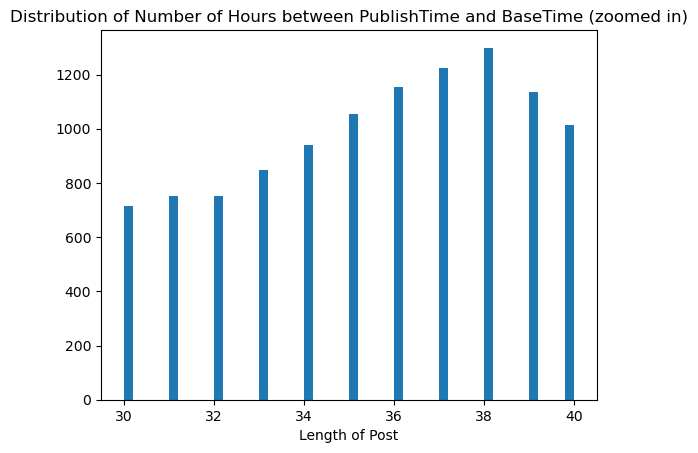

In [223]:
print("> Graphical Distribution of number of hours between PublishTime and BaseTime")
plt.hist(data, bins = 50, range = (30,40))
plt.title("Distribution of Number of Hours between PublishTime and BaseTime (zoomed in)")
plt.xlabel("Length of Post")
plt.show()

> Graphical Distribution of number of hours between PublishTime and BaseTime


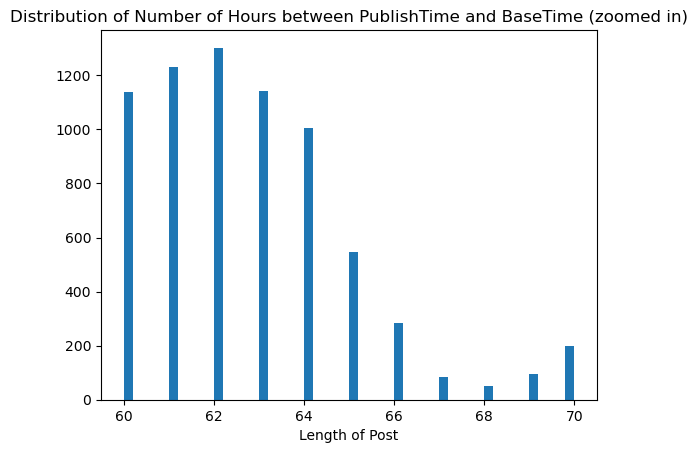

In [224]:
print("> Graphical Distribution of number of hours between PublishTime and BaseTime")
plt.hist(data, bins = 50, range = (60,70))
plt.title("Distribution of Number of Hours between PublishTime and BaseTime (zoomed in)")
plt.xlabel("Length of Post")
plt.show()

#### 3.6. Length of Post (62)
- Median length of post is 1,859
- 96% of training data has a length of post under 10,000
- However, there are 24% of data that has a length of post of 0 which seems a bit strange and could be potential outliers for us... Or could these be posts without any captions and only images? If we assume that these posts only have images, then we can include this data into our analysis as we would be interested to see how having purely images would result in engagment or if words are absolutely necessary...

> Statistical Summary of length_post


count    49203.000000
mean      2900.308152
std       3798.867310
min          0.000000
25%        229.000000
50%       1928.000000
75%       4021.000000
max      57894.000000
Name: length_post, dtype: float64

> Graphical Distribution of length_post


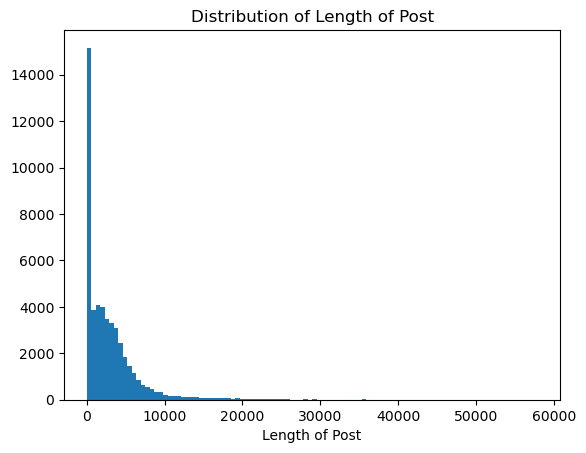

> Insight: Seems to be a significant spike around length of 0 which is strange


In [225]:
data = merged_df.length_post

print("> Statistical Summary of length_post")
display(data.describe())

print("> Graphical Distribution of length_post")
plt.hist(data, bins = 100)
plt.title("Distribution of Length of Post")
plt.xlabel("Length of Post")
plt.show()
print("> Insight: Seems to be a significant spike around length of 0 which is strange")

In [226]:
print("> Insight: The percentage of training data that has a length of post of 0")
print(100 * data[data == 0].shape[0] / data.shape[0], "\n")

print("> Insight: The percentage of training data that has a length of post below 1000")
print(100 * data[(data <= 2000)].shape[0] / data.shape[0], "\n")

print("> Insight: The percentage of training data that has a length of post below 10000")
print(100 * data[(data <= 10000)].shape[0] / data.shape[0])

> Insight: The percentage of training data that has a length of post of 0
22.563664817185945 

> Insight: The percentage of training data that has a length of post below 1000
50.95624250553828 

> Insight: The percentage of training data that has a length of post below 10000
95.84374936487613


> Statistical Summary of length_post


count    49203.000000
mean      2900.308152
std       3798.867310
min          0.000000
25%        229.000000
50%       1928.000000
75%       4021.000000
max      57894.000000
Name: length_post, dtype: float64

> Graphical Distribution of length_post


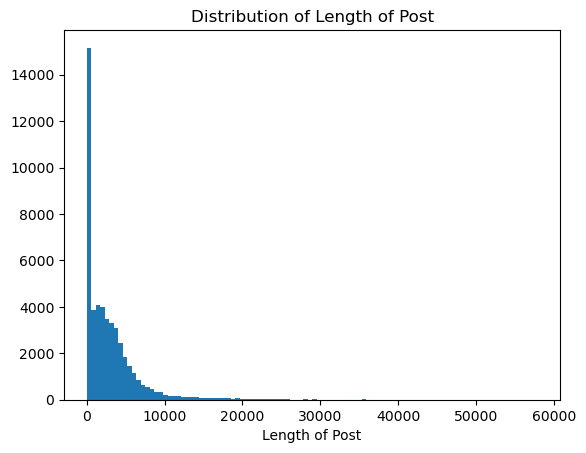

> Insight: Seems to be a significant spike around length of 0 which is strange


In [227]:
data = merged_df.length_post

print("> Statistical Summary of length_post")
display(data.describe())

print("> Graphical Distribution of length_post")
plt.hist(data, bins = 100)
plt.title("Distribution of Length of Post")
plt.xlabel("Length of Post")
plt.show()
print("> Insight: Seems to be a significant spike around length of 0 which is strange")

In [228]:
print("> Insight: The percentage of training data that has a length of post of 0")
print(100 * data[data == 0].shape[0] / data.shape[0], "\n")

print("> Insight: The percentage of training data that has a length of post below 1000")
print(100 * data[(data <= 1000)].shape[0] / data.shape[0], "\n")

print("> Insight: The percentage of training data that has a length of post below 10000")
print(100 * data[(data <= 10000)].shape[0] / data.shape[0])

> Insight: The percentage of training data that has a length of post of 0
22.563664817185945 

> Insight: The percentage of training data that has a length of post below 1000
36.67865780541837 

> Insight: The percentage of training data that has a length of post below 10000
95.84374936487613


#### 3.7. Day of Week of Publish
- Days of Week publish seems to have a decent distribution

> Graphical Distribution of publish day of week


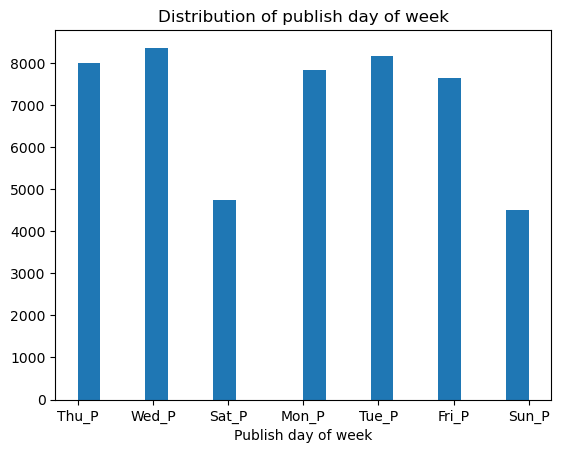

In [229]:
data = merged_df['dow_P']

print("> Graphical Distribution of publish day of week")
plt.hist(data, bins = 20)
plt.title("Distribution of publish day of week")
plt.xlabel("Publish day of week")
plt.show()

In [230]:
pd.DataFrame(data.value_counts())

pd.DataFrame(data.value_counts() * 100/ data.shape[0])

,count
dow_P,
Wed_P,16.988801
Tue_P,16.580290
Thu_P,16.244944
Mon_P,15.907567
Fri_P,15.503120
Sat_P,9.631527
Sun_P,9.143751


In [231]:
# Afterwards, I still need to determine the best target variables... Create a logic to logically test target at different points of time. 
# Need to figure out how to split the data here where time between lodgement and basetime is at milestone 1, milestone 2 and publish and mileston3...

# Therefore I will have different temporal splits of data relative to basetime and I can use col52,53,54 as new targets? 

# And then check to see what are the relationships between the new targets and the other features using some data analysis and correlation plots etc...

# and then once I have some findings I can refer back to the booklets I have on next steps and anything I have missed out

# And then I can start summarizing my findings to be used in the ppt

# And then I can begin the MODELLING and prediction + Tuning + INterpretation + get insights from this prototype too+ TEST RESULTS etc...

#### 3.8. Removing Outliers
Removed data where:
- Number of Parent Pages > 0 (We are only interested in predicting how well a source post would be, not how well a trackback post will be)

Filter data where:
- Filter by length of post == 0 vs length of post > 0. We want to see if having no words generally has better engagement or not? 

Final_Data:
- merged_df_pruned

In [232]:
# Removing where number of parent pages > 0
merged_df_pruned = merged_df[merged_df.num_parent == 0]
print("Removed ", merged_df.shape[0] - merged_df_pruned.shape[0], "instances...")

merged_df_pruned.shape

Removed  2764 instances...


(46439, 282)

#### 3.9. Defining New Targets
- If a post has more than 100 comments between PublishTime and BaseTime, then we can consider it as a successful post (i.e. if col_51 > 100, then good engagement).
- If a post gets more than 9 comments in the next 24 hours + 100 comments up until now, then very good engagement.

- Use target 'high_engagement_v3' from df 'merged_df_pruned_with_target'

In [233]:
# Doing some analysis on our KPIs to see what is considered as a good number of comments/trackbacks...
target_candidates = ['num_comments_51', 'num_comments_next_24_TB']
df_target = merged_df_pruned[target_candidates]
df_target.head()

# then should I only be looking at those where the a parent post??? Maybe I should separate them. Do analysis for parent posts only + analysis for trackback posts

# Where high number (above 100) of comments up until BaseTime AND number of new comments in next 24 hours is more than 9
df_target['high_engagement'] = np.where((df_target.num_comments_51 >= 100) & (df_target.num_comments_next_24_TB >= 9), 1, 0)

# Where high number (above 100) of comments up until BaseTime OR number of new comments in next 24 hours is more than 9
df_target['high_engagement_v2'] = np.where((df_target.num_comments_51 >= 100) | (df_target.num_comments_next_24_TB >= 9), 1, 0)

# Where number of comments up until BaseTime + number of new comments in next 24 hours is high (above 100)
df_target['high_engagement_v3'] = np.where((df_target.num_comments_51) + (df_target.num_comments_next_24_TB) >= 100, 1, 0)

# Where number of comments up until BaseTime + number of new comments in next 24 hours is high (above 100)
df_target['high_engagement_v4'] = np.where(df_target.num_comments_51 >= 100, 1, 0)

print(df_target.high_engagement.value_counts())
print(df_target.high_engagement_v2.value_counts())
print(df_target.high_engagement_v3.value_counts())
print(df_target.high_engagement_v4.value_counts())

merged_df_pruned_with_target = merged_df_pruned.merge(df_target.high_engagement_v3, left_index = True, right_index = True)

high_engagement
0    44728
1     1711
Name: count, dtype: int64
high_engagement_v2
0    38990
1     7449
Name: count, dtype: int64
high_engagement_v3
0    40950
1     5489
Name: count, dtype: int64
high_engagement_v4
0    41618
1     4821
Name: count, dtype: int64


/var/folders/gd/lsdt5y754fl3r9jg4qztyy180000gn/T/ipykernel_40808/2826540347.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['high_engagement'] = np.where((df_target.num_comments_51 >= 100) & (df_target.num_comments_next_24_TB >= 9), 1, 0)
/var/folders/gd/lsdt5y754fl3r9jg4qztyy180000gn/T/ipykernel_40808/2826540347.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['high_engagement_v2'] = np.where((df_target.num_comments_51 >= 100) | (df_target.num_comments_next_24_TB >= 9), 1, 0)
/v

### 4. Hypotheses

#### H1 - What is the optimal length of a post?
- Optimal length of post is to have around 4k-5k words in the post. This will improve likelihood of high engagement by 24%

In [234]:
# Binning the continuous data 
def get_length_bucket(length_post):
    if length_post == 0:
        return '0'
    elif length_post <= 1000:
        return '0-1k'
    elif length_post <= 2000:
        return '1k-2k'
    elif length_post <= 3000:
        return '2k-3k'
    elif length_post <= 4000:
        return '3k-4k'
    elif length_post <= 5000:
        return '4k-5k'
    elif length_post <= 6000:
        return '5k-6k'
    elif length_post <= 7000:
        return '6k-7k'
    elif length_post <= 8000:
        return '7k-8k'
    elif length_post <= 9000:
        return '8k-9k'
    elif length_post <= 10000:
        return '9k-10k'
    elif length_post > 10000:
        return '> 10k'
    else:
        return 'ERROR'

merged_df_pruned_with_target['length_bucket'] = merged_df_pruned_with_target['length_post'].apply(get_length_bucket)


In [235]:
merged_df_pruned_with_target.length_bucket.value_counts()

length_bucket
0         10806
0-1k       6786
1k-2k      6750
2k-3k      5764
3k-4k      5072
4k-5k      3523
5k-6k      2240
> 10k      1885
6k-7k      1478
7k-8k       958
8k-9k       670
9k-10k      507
Name: count, dtype: int64

In [236]:
A = pd.DataFrame(merged_df_pruned_with_target.length_bucket.value_counts())
B = pd.DataFrame(merged_df_pruned_with_target[merged_df_pruned_with_target.high_engagement_v3 == 1].length_bucket.value_counts()).rename(columns = {'count': 'high_engagement'})
C = pd.DataFrame(merged_df_pruned_with_target[merged_df_pruned_with_target.high_engagement_v3 == 1].length_bucket.value_counts()*100 / merged_df_pruned_with_target.length_bucket.value_counts()).rename(columns = {'count': 'high_engagement_pct'})

A.merge(B, left_index = True, right_index = True).merge(C, left_index = True, right_index = True)

,count,high_engagement,high_engagement_pct
length_bucket,,,
0,10806,827,7.653156
0-1k,6786,285,4.199823
1k-2k,6750,579,8.577778
2k-3k,5764,823,14.278279
3k-4k,5072,943,18.592271
4k-5k,3523,803,22.793074
5k-6k,2240,436,19.464286
> 10k,1885,208,11.034483
6k-7k,1478,310,20.974290


#### H2 - What are some key words in a successful post?
- There are some words that were associated with high engagement posts. 

In [237]:
temp_bow_df = pd.merge(merged_df_pruned_with_target[df_bow_col_list], merged_df_pruned_with_target['high_engagement_v3'], left_index = True, right_index = True)

data = temp_bow_df[df_bow_col_list]

#new_column_names = [f'{i}' for i in range(0, 200, 1)]
#data.columns = new_column_names

#data.sum().plot(kind='bar')
A = pd.DataFrame(data.sum()).rename(columns = {0 : 'Count'})
B = pd.DataFrame(temp_bow_df[temp_bow_df.high_engagement_v3 == 1].sum()).rename(columns = {0 : 'High_Engagement_Count'})
C = pd.DataFrame(temp_bow_df[temp_bow_df.high_engagement_v3 == 1].sum()*100/ data.sum()).rename(columns = {0 : 'High_Engagement_pct'})

bow_results = A.merge(B, left_index = True, right_index = True).merge(C, left_index = True, right_index = True)

<Axes: >

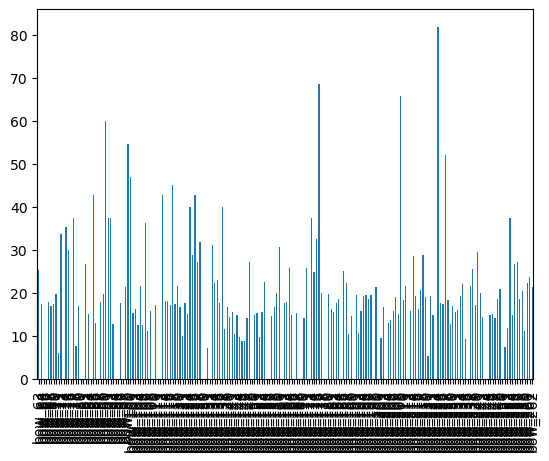

In [238]:
bow_results.High_Engagement_pct.plot(kind='bar')

In [239]:
bow_results[bow_results.High_Engagement_pct > 50]

,Count,High_Engagement_Count,High_Engagement_pct
bow_90,5.0,3.0,60.000000
bow_99,11.0,6.0,54.545455
bow_176,35.0,24.0,68.571429
bow_209,38.0,25.0,65.789474
bow_224,11.0,9.0,81.818182
bow_227,200.0,104.0,52.000000


In [240]:
top_10_sorted = bow_results.sort_values(by='High_Engagement_pct', ascending=False).head(10)

print(top_10_sorted)

         Count  High_Engagement_Count  High_Engagement_pct
bow_224   11.0                    9.0            81.818182
bow_176   35.0                   24.0            68.571429
bow_209   38.0                   25.0            65.789474
bow_90     5.0                    3.0            60.000000
bow_99    11.0                    6.0            54.545455
bow_227  200.0                  104.0            52.000000
bow_100   32.0                   15.0            46.875000
bow_117   80.0                   36.0            45.000000
bow_85    14.0                    6.0            42.857143
bow_113   14.0                    6.0            42.857143


In [241]:
top_10_sorted.index

Index(['bow_224', 'bow_176', 'bow_209', 'bow_90', 'bow_99', 'bow_227',
       'bow_100', 'bow_117', 'bow_85', 'bow_113'],
      dtype='object')

#### H3 - What is the optimal day of week to publish?
- Highest engagement is actually on weekdays rather than weekends. However, the difference is not very large. 
- Specificaly, Tue, Wed, Thu were the top 3 days to post that will give the best likeihood of high engagement.
- Potentially visualize the days of week and percentages of them that reach a high engagement.
- Posting between Tues to Thurs will improve likelihood of higher engagement by 14% ~ 13%

In [242]:
A = pd.DataFrame(merged_df_pruned_with_target.dow_P.value_counts()).rename(columns = {'count': 'Number of Posts Published on Day'})
B = pd.DataFrame(merged_df_pruned_with_target[merged_df_pruned_with_target.high_engagement_v3 == 1].dow_P.value_counts()).rename(columns = {'count': 'high_engagement'})
C = pd.DataFrame(merged_df_pruned_with_target[merged_df_pruned_with_target.high_engagement_v3 == 1].dow_P.value_counts()*100 / merged_df_pruned_with_target.dow_P.value_counts()).rename(columns = {'count': 'high_engagement_'})

A.merge(B, left_index = True, right_index = True).merge(C, left_index = True, right_index = True)

,Number of Posts Published on Day,high_engagement,high_engagement_
dow_P,,,
Wed_P,7929,978,12.334468
Tue_P,7725,1036,13.411003
Thu_P,7552,918,12.155720
Mon_P,7390,901,12.192152
Fri_P,7161,838,11.702276
Sat_P,4427,450,10.164897
Sun_P,4255,368,8.648649


##### I want to look at a bit deeper dive here. So, let's see what days are the best to post in terms of new comments within
1. 24 hours of posting
- Filter data where TP-TB = 0, and use the provided number of comments 24 hours after TB (col281)
- Filter data where TP-TB = 24, and use the provided number of comments betweeen T2 and TB (col52)
- Filter data where TP-TB = 48, and use the provided number of comments between T1 and T2 (col53)
- Filter data where TP-TB = 72, and use the provided number of comments between TP and T1 (col54)
2. 48 hours of posting
- Filter data where TP-TB = 24, and use col281 + col52 = total number of comments within 48 hours
- Filter data where TP-TB = 48, and use col53 + col42 = total number of comments within 48 hours
- Filter data where TP-TB = 72, and use col54 + col53 = total number of comments within 48 hours

So, from this, I should get what days are bset to publish on based on the number of new comments within 24 hours and also within 48 hours

### 5. Conclusion
- Probability of a post receiving high engagement = 13%
- Probability of a post pubished on a weekday receiving high engagement = 13%
- Probability of a post with 4000-5000 words receiving high engagement = 24%
- Probability of a post pubished with mention of any of the top 20 keywords receiving high engagement = 48%
- Probability of a post with all of the above receiving high engagement = 67%

In [243]:
# Probability of a High Engagement Post
100*merged_df_pruned_with_target[merged_df_pruned_with_target.high_engagement_v3 == 1].shape[0] / merged_df_pruned_with_target.shape[0]

11.8198066280497

In [244]:
# Probability of a High Engagement Post if you publish on weekdays
100*merged_df_pruned_with_target[(merged_df_pruned_with_target.high_engagement_v3 == 1) 
                                 & (merged_df_pruned_with_target.dow_P.isin(['Mon_P', 'Tue_P', 'Wed_P', 'Thu_P', 'Fri_P']))
                                 ].shape[0] / merged_df_pruned_with_target[merged_df_pruned_with_target.dow_P.isin(['Mon_P', 'Tue_P', 'Wed_P', 'Thu_P', 'Fri_P'])].shape[0]

12.37121593346929

In [245]:
# Probability of a High Engagement Post if you publish with 4000-5000 words
100*merged_df_pruned_with_target[(merged_df_pruned_with_target.high_engagement_v3 == 1) 
                                 & (merged_df_pruned_with_target.length_bucket == '4k-5k')
                                 ].shape[0] / merged_df_pruned_with_target[(merged_df_pruned_with_target.length_bucket == '4k-5k')].shape[0]

22.793074084587

In [246]:
# Probability of a High Engagement Post if you publish with mention of the top 10 keywords

display(top_10_sorted.index)

100 * merged_df_pruned_with_target[(
            (merged_df_pruned_with_target.bow_176 == 1) | 
            (merged_df_pruned_with_target.bow_224 == 1) | 
            (merged_df_pruned_with_target.bow_209 == 1) | 
            (merged_df_pruned_with_target.bow_99 == 1) | 
            (merged_df_pruned_with_target.bow_227 == 1) | 
            (merged_df_pruned_with_target.bow_100 == 1) | 
            (merged_df_pruned_with_target.bow_137 == 1) | 
            (merged_df_pruned_with_target.bow_92 == 1) | 
            (merged_df_pruned_with_target.bow_77 == 1) | 
            (merged_df_pruned_with_target.bow_117 == 1)
        ) & (merged_df_pruned_with_target.high_engagement_v3 == 1)].shape[0] / merged_df_pruned_with_target[(
    (merged_df_pruned_with_target.bow_176 == 1)| 
    (merged_df_pruned_with_target.bow_224 == 1)| 
    (merged_df_pruned_with_target.bow_209 == 1)| 
    (merged_df_pruned_with_target.bow_99 == 1)|  
    (merged_df_pruned_with_target.bow_227 == 1)| 
    (merged_df_pruned_with_target.bow_100 == 1)| 
    (merged_df_pruned_with_target.bow_137 == 1)| 
    (merged_df_pruned_with_target.bow_92 == 1)| 
    (merged_df_pruned_with_target.bow_77 == 1)| 
    (merged_df_pruned_with_target.bow_117 == 1))].shape[0]

Index(['bow_224', 'bow_176', 'bow_209', 'bow_90', 'bow_99', 'bow_227',
       'bow_100', 'bow_117', 'bow_85', 'bow_113'],
      dtype='object')

40.06024096385542

In [247]:
# Probability of a High Engagement Post if we use all of the above optimal
all_filters = merged_df_pruned_with_target[
    (merged_df_pruned_with_target.high_engagement_v3 == 1) 
    & (merged_df_pruned_with_target.dow_P.isin(['Mon_P', 'Tue_P', 'Wed_P', 'Thu_P', 'Fri_P']))
    & (merged_df_pruned_with_target.length_bucket == '4k-5k')
    & ((merged_df_pruned_with_target.bow_176 == 1)| 
        (merged_df_pruned_with_target.bow_224 == 1)| 
        (merged_df_pruned_with_target.bow_209 == 1)| 
        (merged_df_pruned_with_target.bow_99 == 1)|  
        (merged_df_pruned_with_target.bow_227 == 1)| 
        (merged_df_pruned_with_target.bow_100 == 1)| 
        (merged_df_pruned_with_target.bow_137 == 1)| 
        (merged_df_pruned_with_target.bow_92 == 1)| 
        (merged_df_pruned_with_target.bow_77 == 1)| 
        (merged_df_pruned_with_target.bow_117 == 1))
].shape[0]

all_post = merged_df_pruned_with_target[
    (merged_df_pruned_with_target.dow_P.isin(['Mon_P', 'Tue_P', 'Wed_P', 'Thu_P', 'Fri_P']))
    & (merged_df_pruned_with_target.length_bucket == '4k-5k')
    & ((merged_df_pruned_with_target.bow_176 == 1)| 
        (merged_df_pruned_with_target.bow_224 == 1)| 
        (merged_df_pruned_with_target.bow_209 == 1)| 
        (merged_df_pruned_with_target.bow_99 == 1)|  
        (merged_df_pruned_with_target.bow_227 == 1)| 
        (merged_df_pruned_with_target.bow_100 == 1)| 
        (merged_df_pruned_with_target.bow_137 == 1)| 
        (merged_df_pruned_with_target.bow_92 == 1)| 
        (merged_df_pruned_with_target.bow_77 == 1)| 
        (merged_df_pruned_with_target.bow_117 == 1))
].shape[0]

100*all_filters/all_post

59.67741935483871

In [248]:
all_filters

74

In [249]:
all_post

124

In [250]:
merged_df_pruned_with_target.to_csv("merged_df_pruned_with_target.csv")